# Pulsar Prediction Data Wrangling and Visualization

# Import necessary packages

In [218]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

# For Evaluations and Random Forest
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from tabulate import tabulate
import scikitplot as skplt

# For Displaying Images
from IPython.display import Image

# For TensorFlow (Later)
#import tensorflow as tf

# Import data sets

The [pulsar_train](https://www.kaggle.com/colearninglounge/predicting-pulsar-starintermediate), [pulsar_test](https://www.kaggle.com/colearninglounge/predicting-pulsar-starintermediate), and [pulsar](https://www.kaggle.com/brsdincer/pulsar-classification-for-class-prediction) datasets came from Kaggle. 

In [219]:
pulsar_train = pd.read_csv("Data/pulsar_data_train.csv")
pulsar_test = pd.read_csv("Data/pulsar_data_test.csv")
pulsar = pd.read_csv("Data/pulsar.csv")

Look at the shape of the datasets

In [220]:
pulsar_train.shape

(12528, 9)

In [221]:
pulsar_test.shape

(5370, 9)

In [222]:
pulsar.shape

(17898, 9)

# Taking a look at the data sets

In [223]:
pulsar_train

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
...,...,...,...,...,...,...,...,...,...
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143,0.0
12524,115.617188,46.784600,0.218177,0.226757,6.140468,NaN,5.732201,34.357283,0.0
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325,0.0
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018,0.0


In [224]:
pulsar_test

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,116.906250,48.920605,0.186046,-0.129815,3.037625,17.737102,8.122621,78.813405,NaN
1,75.585938,34.386254,2.025498,8.652913,3.765050,21.897049,7.048189,55.878791,NaN
2,103.273438,46.996628,0.504295,0.821088,2.244983,15.622566,9.330498,105.134941,NaN
3,101.078125,48.587487,1.011427,1.151870,81.887960,81.464136,0.485105,-1.117904,NaN
4,113.226562,48.608804,0.291538,0.292120,6.291806,26.585056,4.540138,21.708268,NaN
...,...,...,...,...,...,...,...,...,...
5365,116.531250,51.140269,-0.001220,-0.184189,4.510870,26.599514,6.634989,45.362390,NaN
5366,114.976562,53.783052,0.377599,-0.155708,2.772575,20.838488,8.440796,77.355028,NaN
5367,136.171875,48.924385,NaN,0.063227,2.810201,18.695230,7.848577,69.388978,NaN
5368,106.500000,49.066122,0.245742,0.140377,2.331104,15.417568,9.008041,100.367616,NaN


In [225]:
pulsar

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


# Visualizing and listing the null values

In [226]:
pulsar_train.isnull().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1735
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1178
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     625
target_class                                        0
dtype: int64

<AxesSubplot:>

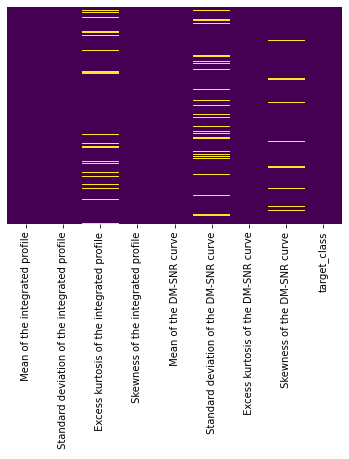

In [227]:
sns.heatmap(pulsar_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [228]:
pulsar_test.isnull().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile        767
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve           524
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     244
target_class                                     5370
dtype: int64

<AxesSubplot:>

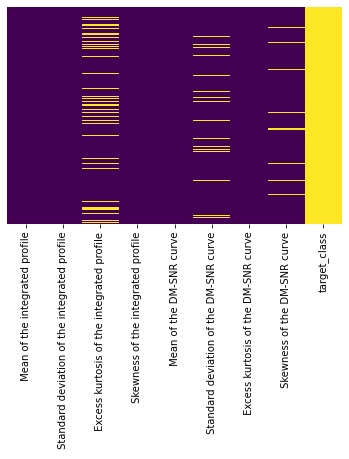

In [229]:
sns.heatmap(pulsar_test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

All of target_class is null in this dataset, but that's to be expected.

In [230]:
pulsar.isnull().sum()

Mean_Integrated         0
SD                      0
EK                      0
Skewness                0
Mean_DMSNR_Curve        0
SD_DMSNR_Curve          0
EK_DMSNR_Curve          0
Skewness_DMSNR_Curve    0
Class                   0
dtype: int64

<AxesSubplot:>

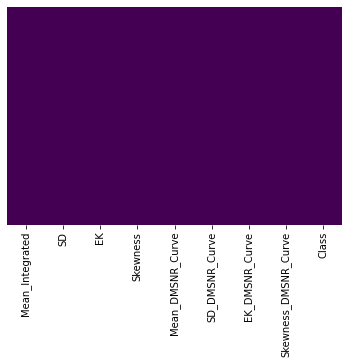

In [231]:
sns.heatmap(pulsar.isnull(), yticklabels=False, cbar=False, cmap='viridis')

This dataset looks good, with no null values, but the column names don't match the ones in the other dataset. 

# Listing data types

In [232]:
pulsar_train.dtypes

 Mean of the integrated profile                  float64
 Standard deviation of the integrated profile    float64
 Excess kurtosis of the integrated profile       float64
 Skewness of the integrated profile              float64
 Mean of the DM-SNR curve                        float64
 Standard deviation of the DM-SNR curve          float64
 Excess kurtosis of the DM-SNR curve             float64
 Skewness of the DM-SNR curve                    float64
target_class                                     float64
dtype: object

In [233]:
pulsar_test.dtypes

 Mean of the integrated profile                  float64
 Standard deviation of the integrated profile    float64
 Excess kurtosis of the integrated profile       float64
 Skewness of the integrated profile              float64
 Mean of the DM-SNR curve                        float64
 Standard deviation of the DM-SNR curve          float64
 Excess kurtosis of the DM-SNR curve             float64
 Skewness of the DM-SNR curve                    float64
target_class                                     float64
dtype: object

In [234]:
pulsar.dtypes

Mean_Integrated         float64
SD                      float64
EK                      float64
Skewness                float64
Mean_DMSNR_Curve        float64
SD_DMSNR_Curve          float64
EK_DMSNR_Curve          float64
Skewness_DMSNR_Curve    float64
Class                     int64
dtype: object

All of the data is numerical, but there are a lot of NaN values. Also, the column names are different between the pulsar_test/train datasets and the pulsar dataset.  

After studying the data, I decided to find the original data set and start the project from scratch with that. 
The NaN and the column title discrepancies gave me reasons to be concerned. 

# Importing a new dataset

In [235]:
pulsars_column = ["Mean IP", "SD IP", "EK IP", "SK IP", "Mean DM-SNR", "SD DM-SNR", "EK DM-SNR", "SK DM-SNR", "Class"]

In [236]:
pulsars = pd.read_csv("Data/HTRU_2.csv", names=pulsars_column)

For citation purposes, this [dataset](https://archive.ics.uci.edu/ml/datasets/HTRU2) was downloaded from 
R. J. Lyon, B. W. Stappers, S. Cooper, J. M. Brooke, J. D. Knowles, Fifty Years of Pulsar Candidate Selection: From simple filters to a new principled real-time classification approach MNRAS, 2016.

[Interactive Pulsar Map](https://ishivvers.github.io/maps/pulsars.html)

Since the dataset didn't have column names, I had to add some.
The abbreviated column names stand for
mean of the integrated profile, standard deviation of the integrated profile, 
excess kurtosis of the intergrated profile, skewness of the integrated profile, 
mean of the DM-SNR curve, standard deviation of the DM-SNR curve, 
excess kurtosis of the DM-SNR curve, skewness of the DM-SNR curve, and class. 

# Integrated Profiles

Individual bursts are not very consistent, so integrated pulse profiles are obtained by integrating thousand of individual pulses.

These are generally stable readings.

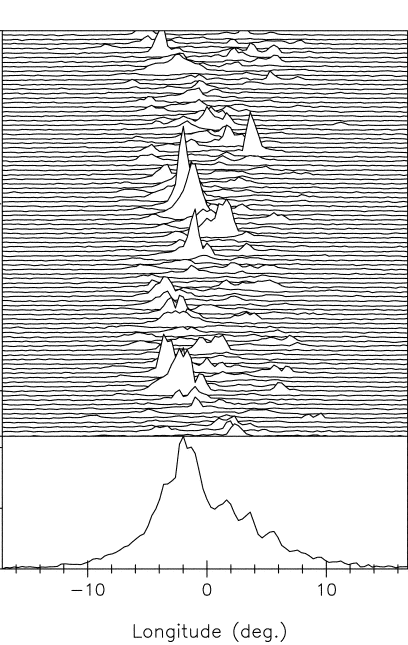

The top part of the illustration is the readings from the individual waves. The bottom part is a plot of the average of all of those waves.

[Source](https://as595.github.io/classification/)

# DM-SNR

The dispersion measure (DM) is the effect of the interstellar medium, whatever the pulse is traveling through. SNR stands for the signal to noise ratio.

The DM allows us to distinguish pulsars from other noise in space.

<img src="Images/Dispersion Measure.png" alt="drawing" width="600"/>

[Source](https://www.cv.nrao.edu/~sransom/web/Ch6.html)

# Table of Column Abbreviation Meanings

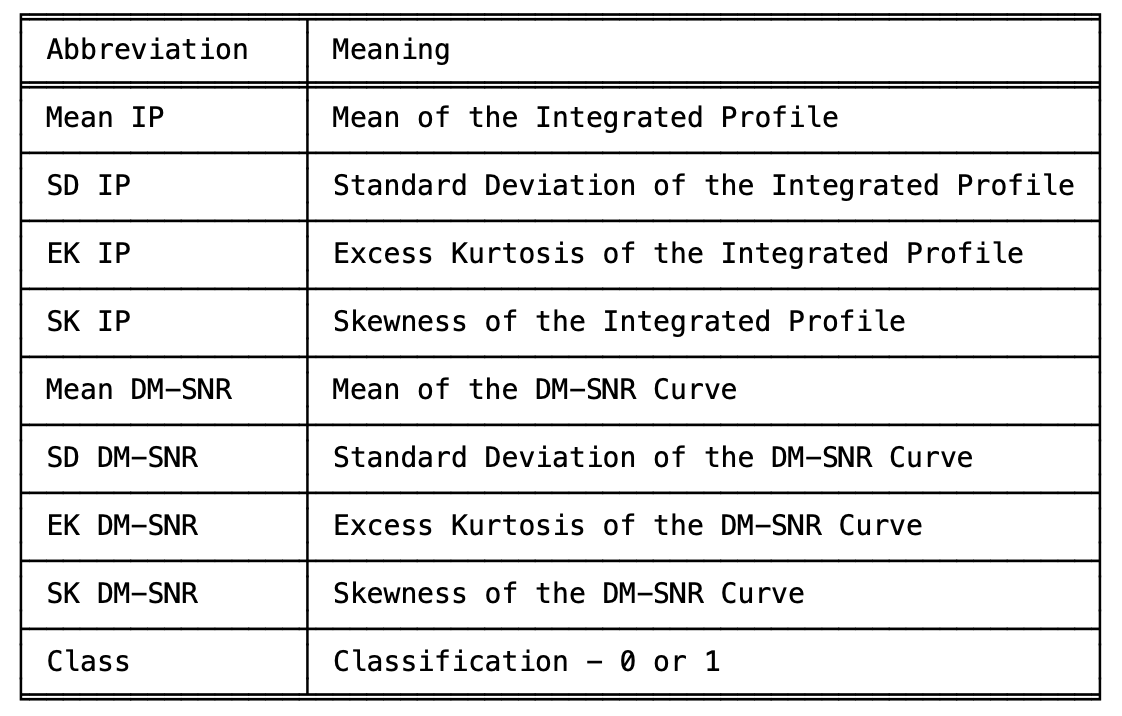

In [237]:
Image('Images/Column Meanings.png')

# Key Python Code 

<table class="table table-striped">
  <tr>
    <th>Keyword</th>
    <th>Description</th>
  </tr>
  <tr>
    <td style="font-weight: bold;" nowrap>Keyword 1</td>
    <td>A description of the keyword.</td>
  </tr>
  <tr>
    <td style="font-weight: bold;" nowrap>Keyword 2</td>
    <td>A description of the keyword.</td>
  </tr>
  <tr>
    <td style="font-weight: bold;" nowrap>Keyword 3</td>
    <td>A description of the keyword.</td>
  </tr>
  <tr>
    <td style="font-weight: bold;" nowrap>Keyword 4</td>
    <td>A description of the keyword.</td>
  </tr>
  <tr>
    <td style="font-weight: bold;" nowrap>Keyword 5</td>
    <td>A description of the keyword.</td>
  </tr>
</table>

Exporting the pulsars.csv dataset, with column names, to use in Tableau

In [238]:
pulsars.to_csv(r'Data/pulsars.csv', index = False)

# Looking at the New Dataset

In [239]:
pulsars.head()

,Mean IP,SD IP,EK IP,SK IP,Mean DM-SNR,SD DM-SNR,EK DM-SNR,SK DM-SNR,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


# Listing and visualizing the null values

In [240]:
pulsars.isnull().sum()

Mean IP        0
SD IP          0
EK IP          0
SK IP          0
Mean DM-SNR    0
SD DM-SNR      0
EK DM-SNR      0
SK DM-SNR      0
Class          0
dtype: int64

<AxesSubplot:>

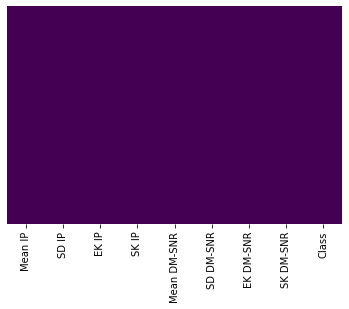

In [241]:
sns.heatmap(pulsars.isnull(), yticklabels=False, cbar=False, cmap='viridis')

There are no NaN values, so I don't have to replace any missing data.

# Checking data types for each variable

In [242]:
pulsars.dtypes

Mean IP        float64
SD IP          float64
EK IP          float64
SK IP          float64
Mean DM-SNR    float64
SD DM-SNR      float64
EK DM-SNR      float64
SK DM-SNR      float64
Class            int64
dtype: object

All variables are numeric and are either floats or integers, so no further wrangling is necessary. Everything looks good and the data is ready for the machine learning model. 
The pulsar_train, pulsar_test, and pulsar datasets will be disregarded and I will use the pulsars dataset. 

# Resuming data wrangling and exploration. 

# Describe the data sets

In [243]:
pulsars

,Mean IP,SD IP,EK IP,SK IP,Mean DM-SNR,SD DM-SNR,EK DM-SNR,SK DM-SNR,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [244]:
pulsars.describe()

,Mean IP,SD IP,EK IP,SK IP,Mean DM-SNR,SD DM-SNR,EK DM-SNR,SK DM-SNR,Class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


# Exploratory analysis


array([[<AxesSubplot:title={'center':'Mean IP'}>,
        <AxesSubplot:title={'center':'SD IP'}>,
        <AxesSubplot:title={'center':'EK IP'}>],
       [<AxesSubplot:title={'center':'SK IP'}>,
        <AxesSubplot:title={'center':'Mean DM-SNR'}>,
        <AxesSubplot:title={'center':'SD DM-SNR'}>],
       [<AxesSubplot:title={'center':'EK DM-SNR'}>,
        <AxesSubplot:title={'center':'SK DM-SNR'}>,
        <AxesSubplot:title={'center':'Class'}>]], dtype=object)

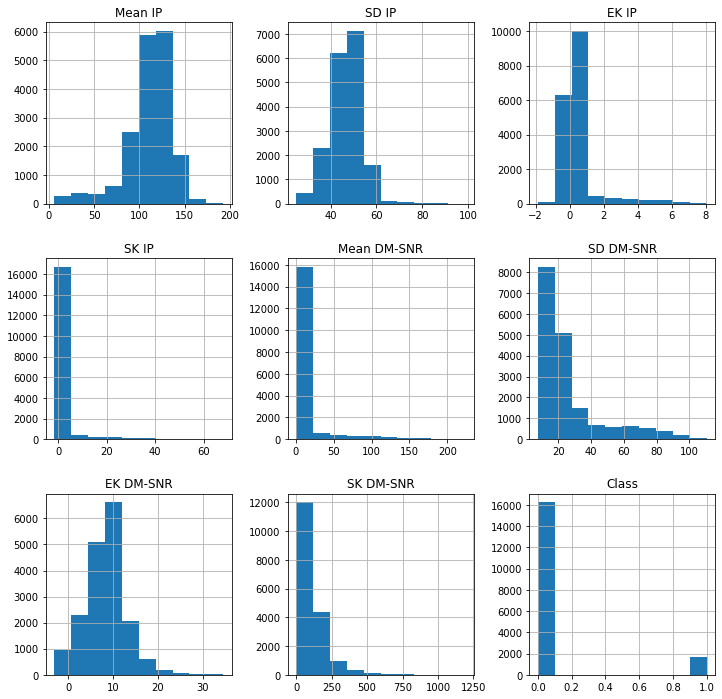

In [245]:
pulsars.hist(figsize=(12,12))

In [246]:
corrPearson = pulsars.corr(method="pearson")

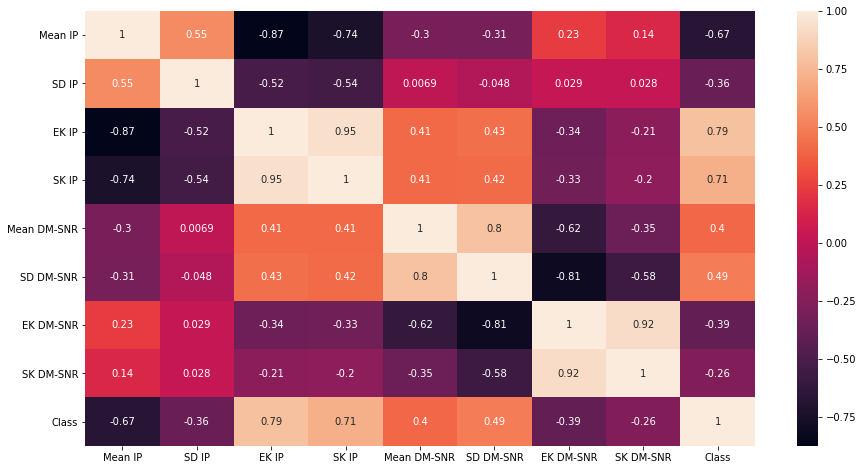

In [247]:
figure = plt.figure(figsize=(15,8))
sns.heatmap(corrPearson,annot=True)
plt.show()

It's hard to determine whether the correlations are significant without comparing to the p-value, but there appear to be some strong positive and negative correlations between variables.

<AxesSubplot:xlabel='Class', ylabel='count'>

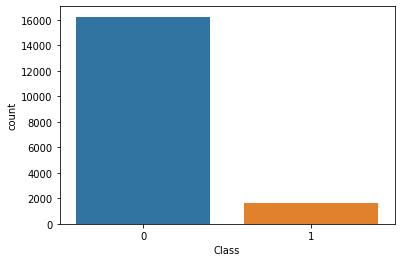

In [248]:
sns.countplot(x='Class', data=pulsars)

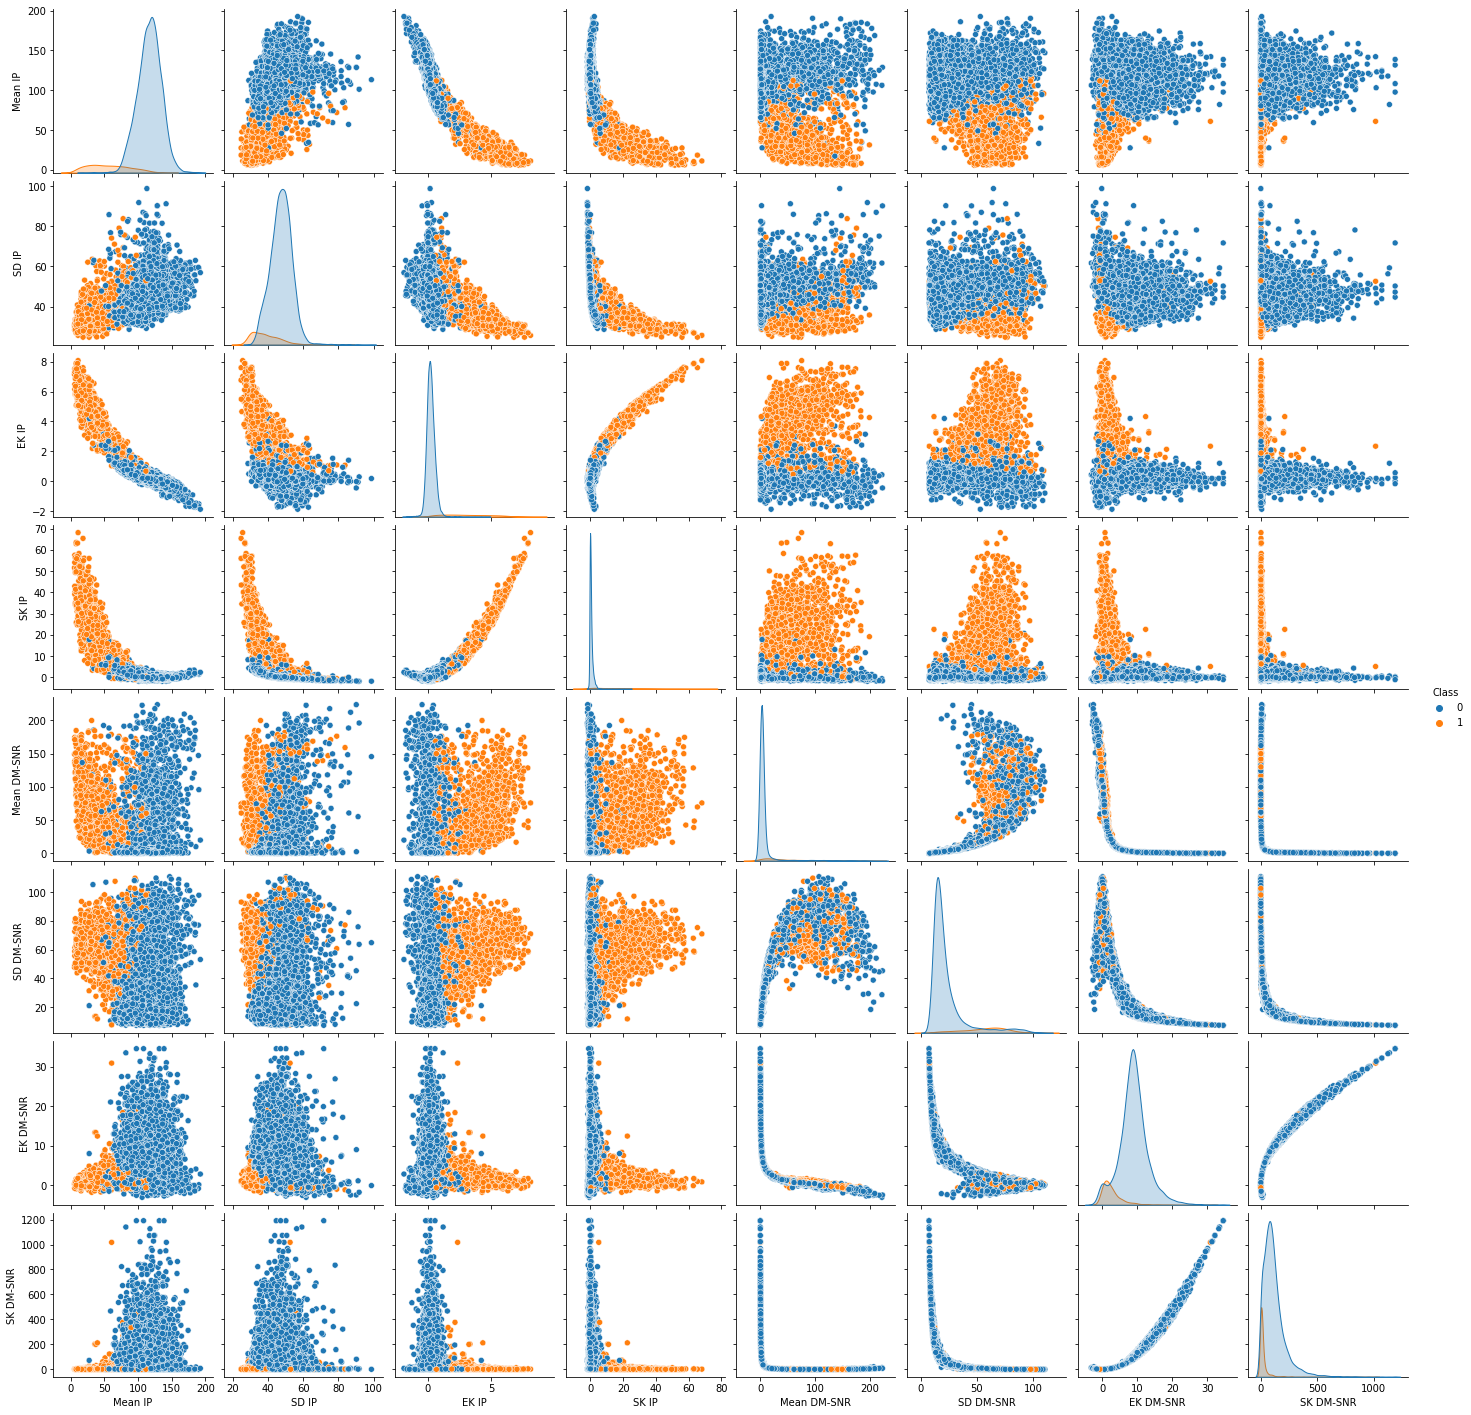

In [249]:
sns.pairplot(data=pulsars, hue='Class')

# Visualizing Outliers

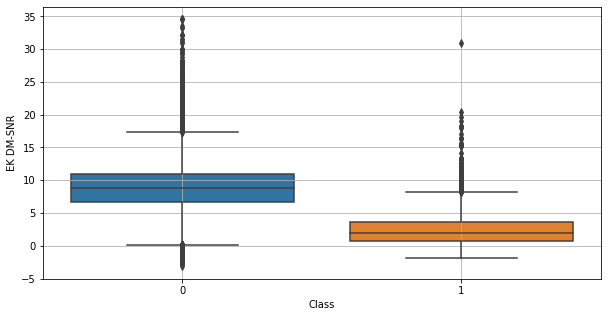

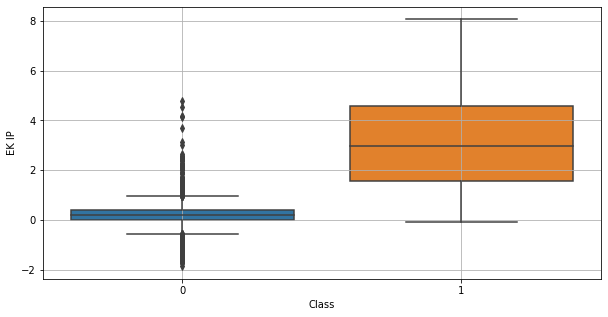

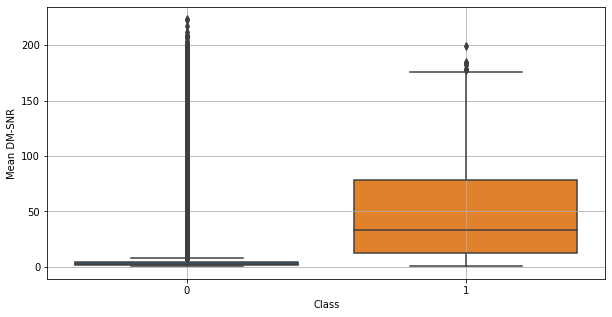

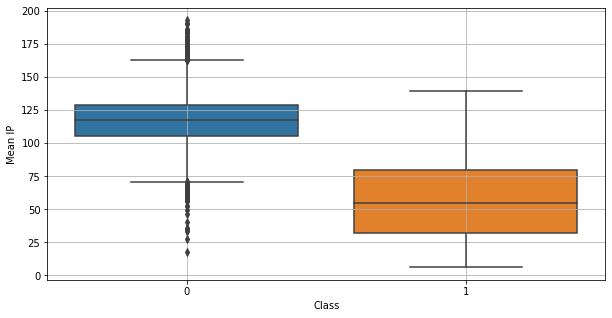

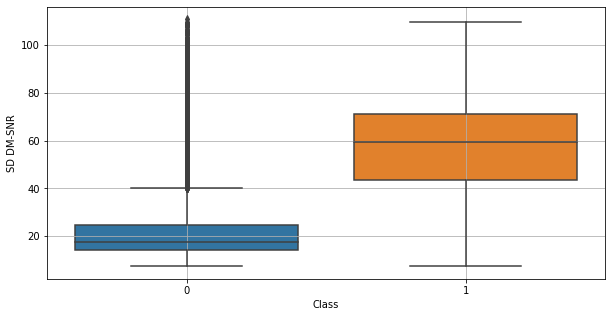

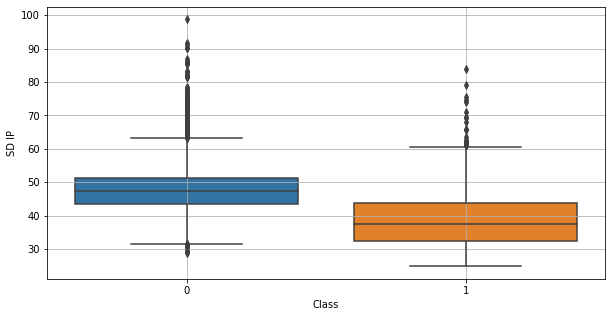

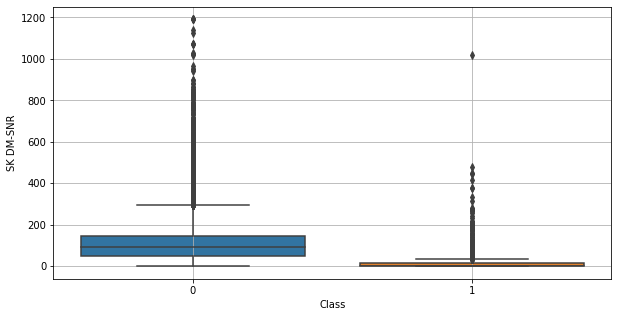

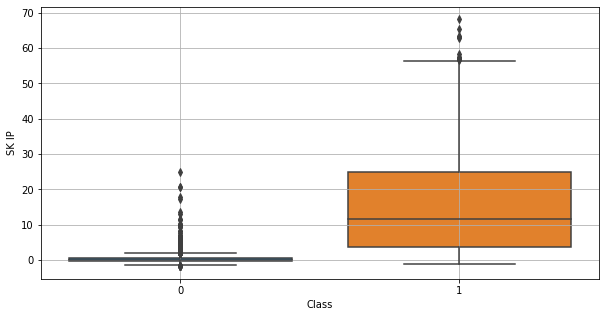

In [250]:
continous_features = list(set(pulsars.columns) - set(['Class']))
continous_features.sort()
continous_features

for i in range(len(continous_features)):
  feature = continous_features[i]
  plt.figure(figsize = (10, 5))
  sns.boxplot(x = 'Class', y = continous_features[i], data = pulsars)
  plt.grid()
  plt.show()

# Setting up the machine learning model.
# Setting x and y 

In [251]:
x = pulsars.drop('Class', axis=1)
y = pulsars['Class']

In [252]:
x.head()

,Mean IP,SD IP,EK IP,SK IP,Mean DM-SNR,SD DM-SNR,EK DM-SNR,SK DM-SNR
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306


In [253]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

# Possible unique values of the class to be predicted

In [254]:
print(y.unique())

[0 1]


# Train, test, split

In [255]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=101)

# Show the shape of the target class for train and test

In [256]:
print(y_train.shape)
print(y_test.shape)

(12528,)
(5370,)


# Trying a single decision tree

In [257]:
decisionTree = DecisionTreeClassifier(random_state=101)
decisionTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=101)

In [258]:
treePredictions = decisionTree.predict(x_test)
print(confusion_matrix(y_test, treePredictions))
print(classification_report(y_test, treePredictions))

[[4820   79]
 [  72  399]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4899
           1       0.83      0.85      0.84       471

    accuracy                           0.97      5370
   macro avg       0.91      0.92      0.91      5370
weighted avg       0.97      0.97      0.97      5370



Precision and accuracy are good, but could be better. 
# Next, I'll try the random forest.

Loading the data back in

In [259]:
pulsars_column = ["Mean IP", "SD IP", "EK IP", "SK IP", "Mean DM-SNR", "SD DM-SNR", "EK DM-SNR", "SK DM-SNR", "Class"]

In [260]:
pulsars = pd.read_csv("Data/HTRU_2.csv", names=pulsars_column)

In [261]:
x1 = pulsars.drop('Class', axis=1)
y1 = pulsars['Class']

# Train, test, split

In [262]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1,y1, test_size=0.3, random_state=101)

# Show the shape of the target class for train and test

In [263]:
print(y_train1.shape)
print(y_test1.shape)

(12528,)
(5370,)


# Set up the random forest model

In [264]:
forest = RandomForestClassifier(n_estimators=500, random_state=101)
forest.fit(x_train1, y_train1)

RandomForestClassifier(n_estimators=500, random_state=101)

In [265]:
forestPredictions = forest.predict(x_test1)
print(confusion_matrix(y_test1, forestPredictions))
print(classification_report(y_test1, forestPredictions))

[[4872   27]
 [  67  404]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4899
           1       0.94      0.86      0.90       471

    accuracy                           0.98      5370
   macro avg       0.96      0.93      0.94      5370
weighted avg       0.98      0.98      0.98      5370



Accuracy is already better, but it can be further improved with hyparameter tuning.

# Hyperparameter Tuning

Determine the best number of trees for the model. The closer to 1, the more accuate the model will be. 

1 : 0.9670391061452513
4 : 0.9789571694599628
5 : 0.9800744878957169
8 : 0.9806331471135941
10 : 0.9802607076350093
20 : 0.9824953445065177
50 : 0.9834264432029796
75 : 0.9830540037243948
100 : 0.9830540037243948
250 : 0.9828677839851024
500 : 0.9824953445065177


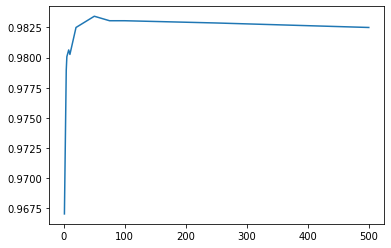

In [266]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=101)
    forest.fit(x_train1, y_train1)
    result = accuracy_score(y_test1, forest.predict(x_test1))
    results.append(result) 
    print(n, ':', result)
    
plt.plot(n_estimators_array, results)

The model looks the most accurate when using 50 trees. 

# Tuning the Remaining Three Values

In [267]:
# Number of features to consider at every split
max_features = ['auto', None, 'log2']
# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, None]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'max_features': ['auto', None, 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None], 'min_samples_leaf': [1, 2, 4]}


In [268]:
rf = RandomForestClassifier(n_estimators=50)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 90, cv = 3, random_state=101)

In [ ]:
rf_random.fit(x_train1, y_train1)

In [ ]:
rf_random.best_params_

This means that the model with the best accuracy has at least 2 samples per leaf, leaves the max features setting on log2, and has a maximum depth of 10.

So, lets put that into our model.

In [ ]:
forest = RandomForestClassifier(n_estimators=50, min_samples_leaf=2, max_features="log2", max_depth=10)
forest.fit(x_train1, y_train1)

Now, to see if our model has improved results. 

In [ ]:
forestPredictions = forest.predict(x_test1)
print(confusion_matrix(y_test1, forestPredictions))
print(classification_report(y_test1, forestPredictions))

After running hyperparameter tuning, I found that the model is the most accurate when the number of trees = 50, the min_samples_leaf = 4, max_features = log2, and max_depth = 10.

# Feature Importance

Using stepwise regression to determine which variables are the most important doesn't work with machine learning, so feature importance can be run.

In [ ]:
feature_importances = pd.Series(forest.feature_importances_, index=x1.columns)
feature_importances
feature_importances.sort_values(inplace=True)
print(feature_importances)

In [ ]:
feature_importances.plot(kind='barh', figsize=(7,6))

plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Feature Importance of Each X Variable')
plt.grid(False)

# Running the Model Without SK DM-SNR

Since they have very little significance, it's worth running the model without them to see if their columns can be dropped.

In [ ]:
x_drop_SK = x1.drop('SK DM-SNR', axis=1)
y2 = pulsars['Class']

In [ ]:
x_drop_SK

In [ ]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x1,y1, test_size=0.3, random_state=101)

In [ ]:
forest1 = RandomForestClassifier(n_estimators=50, min_samples_leaf=2, max_features="log2", max_depth=10)
forest1.fit(x_train2, y_train2)

In [ ]:
forest1Predictions = forest2.predict(x_test2)
print(confusion_matrix(y_test2, forest1Predictions))
print(classification_report(y_test2, forest1Predictions))

Precision and accuracy are unchanged, so we can remove these variables from the model without negatively affecting the model. 

# Conclusion

The model is accurate enough to be used for reliable pulsar prediction. However, due to the importance of finding pulsars, more work should be done to find an even more accurate model. 

The data could also be scaled to increase accuracy.

# What's next?

# Running the model on another dataset

Let's try using the same methods to predict something else. Let's see if we can predict if a person makes over $50,000 just like we predicted pulsars. 

This [dataset](https://www.kaggle.com/uciml/adult-census-income) and much of the [code](https://www.kaggle.com/jilkothari/prediction-of-income-with-98-accuracy) for the inital data wrangling is from Kaggle. 

In [ ]:
adult = pd.read_csv('Data/adult.csv')

In [ ]:
adult.head()

In [ ]:
adult['income']=adult['income'].map({'<=50K': 0, '>50K': 1})

Since there are some question marks, we'll replace that with NaN and then replace the Nan values after.

In [ ]:
adult.replace('?',np.nan, inplace=True)

In [ ]:
adult['occupation'].describe()

In [ ]:
adult['occupation'] = adult['occupation'].fillna('Prof-specialty')

In [ ]:
adult['workclass'].describe()

In [ ]:
adult['workclass'] = adult['workclass'].fillna('Private')

In [ ]:
adult['native.country'].describe()

In [ ]:
adult['native.country'] = adult['native.country'].fillna('United-States')

In [ ]:
adult.drop(['education.num'], axis = 1, inplace = True)
adult['education'].replace(['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', 'Preschool', '12th'],
                             ' School', inplace = True)
adult['education'].value_counts()

Data exploration can be added to this notebook later. For the sake of time, I'll proceed to building the machine learning model. 

In [ ]:
x1 = adult.drop('income', axis=1)
y1 = adult['income']

In [ ]:
x1

In [ ]:
y1

# Train test split

In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1,y1, test_size=0.3, random_state=101)

In [ ]:
from sklearn import preprocessing

categorical = ['workclass','education', 'marital.status', 'occupation', 'relationship','race', 'sex','native.country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        x_train[feature] = le.fit_transform(x_train[feature])
        x_test[feature] = le.transform(x_test[feature])

In [ ]:
forest = RandomForestClassifier(n_estimators=500, random_state=101)
forest.fit(x_train1, y_train1)

In [ ]:
forestPredictions = forest.predict(x_test1)
print(confusion_matrix(y_test1, forestPredictions))
print(classification_report(y_test1, forestPredictions))

A web app was designed to make it easier to test for pulsars without having to run a model every time.

120.5546875	45.54990543	0.282923998	0.419908714	1.358695652	13.07903424	13.31214143	212.5970294

In [ ]:
%%html
<iframe src="https://predicting-a-pulsar-star.herokuapp.com" width="800" height="1000"></iframe>

# Auto ML

I plan on installing auto-sklearn and run it on this dataset. 

sklearn import automl

build vm or Ubuntu workaround

# Testing Cross Validation

I'm tried cross validation on this dataset, but ran out of time to complete it. I'll also do some work on this and see if it can help make the prediction more accurate. 

model = RandomForestClassifier(random_state=1)
cv = cross_validate(model, x_train, y_train, cv=5)
print(cv['Class'])
print(cv['Class'].mean())

# Tensorflow
I tried running TF, but the kernel kept dying. Once I can get that straightened out, I'll try using it on the dataset.

In [ ]:
from sklearn import tree
tree_clf = tree.DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')
forest1(tree_clf,x_train,y_train)